# Predicting the Price of a Stock 

In [27]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
#Get the stock quote from yahoo 
df = web.DataReader('TSLA', data_source = 'yahoo', start='2012-01-02', end='2020-12-17')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-12-11,624.000000,596.799988,615.010010,609.989990,46475000.0,609.989990
2020-12-14,642.750000,610.200012,619.000000,639.830017,52040600.0,639.830017
2020-12-15,646.900024,623.799988,643.280029,633.250000,45071500.0,633.250000


In [6]:
#Get the number of rows and columns in the data set 
df.shape 

(2256, 6)

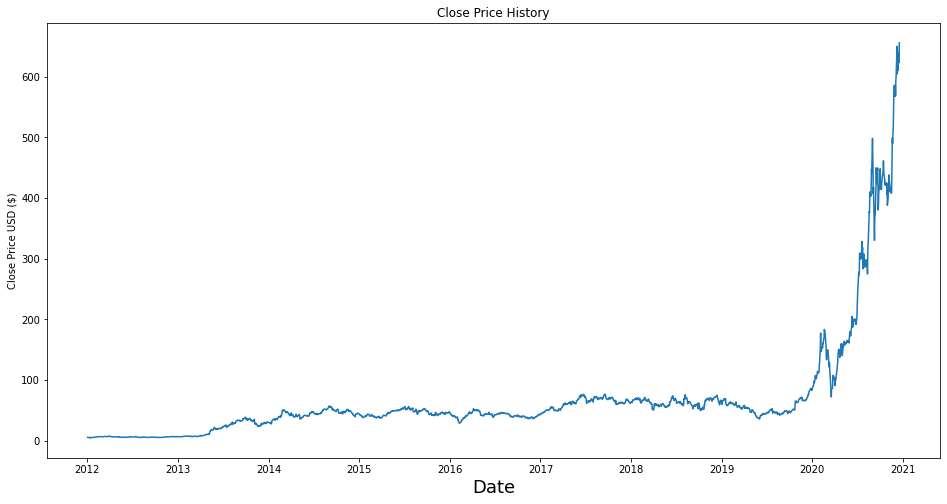

In [7]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [8]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Close'] = df['Close'].rolling(window=30).mean()
SMA30

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2020-12-11,505.982332
2020-12-14,514.375333
2020-12-15,522.133332


In [9]:
#Create the simple moving average with a 90 day window
SMA90 = pd.DataFrame()
SMA90['Close'] = df['Close'].rolling(window=90).mean()
SMA90

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2020-12-11,439.369888
2020-12-14,443.168933
2020-12-15,446.976800


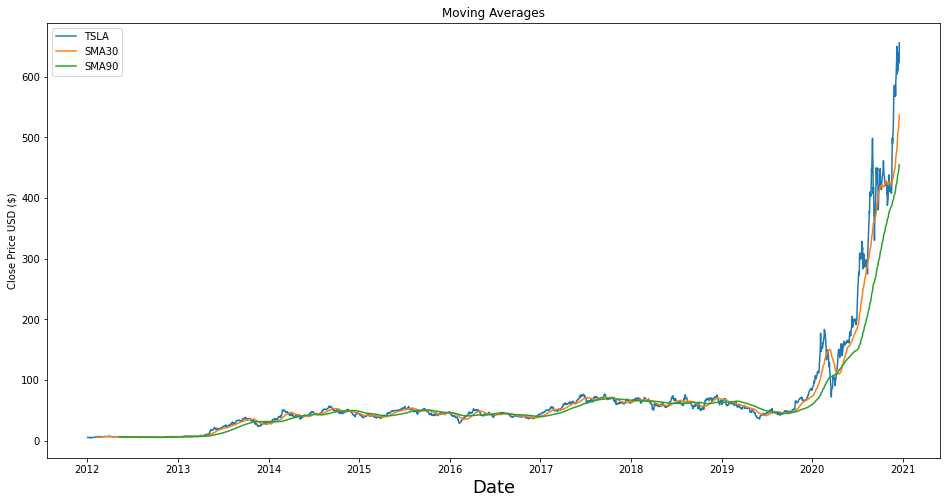

In [10]:
#Visualize the closing price history and determining buying points 
plt.figure(figsize=(16,8))
plt.title('Moving Averages')
plt.plot(df['Close'], label = 'TSLA')
plt.plot(SMA30['Close'], label = 'SMA30')
plt.plot(SMA90['Close'], label = 'SMA90')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)')
plt.legend(loc=('upper left'))
plt.show()

In [11]:
#Create a new dataframe with only the Close column 
data = df.filter(['Close'])
#Convert the dataframe to a numpy array 
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1805

In [12]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00162434],
       [0.00151073],
       [0.00132956],
       ...,
       [0.96522561],
       [0.94913578],
       [1.        ]])

In [13]:
#Create the training data set 
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.00162434, 0.00151073, 0.00132956, 0.00126508, 0.00136948,
       0.00148309, 0.0016704 , 0.00167654, 0.        , 0.00116989,
       0.00123437, 0.00121902, 0.00116989, 0.00122209, 0.00142168,
       0.00159056, 0.00188841, 0.00200816, 0.00208186, 0.00192833,
       0.00208493, 0.00229066, 0.00256701, 0.0027666 , 0.00270518,
       0.00280651, 0.0030061 , 0.00255165, 0.00267141, 0.00318727,
       0.0033193 , 0.00349739, 0.00373997, 0.00359565, 0.00350968,
       0.00360486, 0.00336536, 0.00332544, 0.00338378, 0.00326096,
       0.00356802, 0.00345441, 0.0033715 , 0.00316884, 0.00317191,
       0.00315656, 0.00366935, 0.00405931, 0.00408388, 0.00383823,
       0.00374918, 0.00384744, 0.00374304, 0.0037369 , 0.00379524,
       0.00356495, 0.00346669, 0.00448612, 0.00465193, 0.0046243 ])]
[0.004464628234879081]

[array([0.00162434, 0.00151073, 0.00132956, 0.00126508, 0.00136948,
       0.00148309, 0.0016704 , 0.00167654, 0.        , 0.00116989,
       0.00123437, 0.00121902, 0.0

In [14]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array (x_train),np.array(y_train)
x_train.shape

(1745, 60)

In [15]:
#Reshape the data from two dimensions to three dimensions 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1745, 60, 1)

In [16]:
#Build the LSTM model by creating layers with different number of neurons 
model = Sequential ()
model.add (LSTM (50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add (LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#Compile the model #loss shows how well the model did 
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [18]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1745/1745 [==============================] - 268s 154ms/step - loss: 5.6243e-05


In [19]:
#Create the testing data set 
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create a data sets x_test and y_test 
x_test = []
y_test = dataset [training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [20]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [21]:
#Reshape the data to three dimensions
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [22]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [23]:
#Get the root mean squared error (RMSE) #A value 0 is perfect zero score 
rmse = np.sqrt ( np.mean( predictions - y_test)**2)
rmse 

30.272512482433783

C:\Users\nasir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


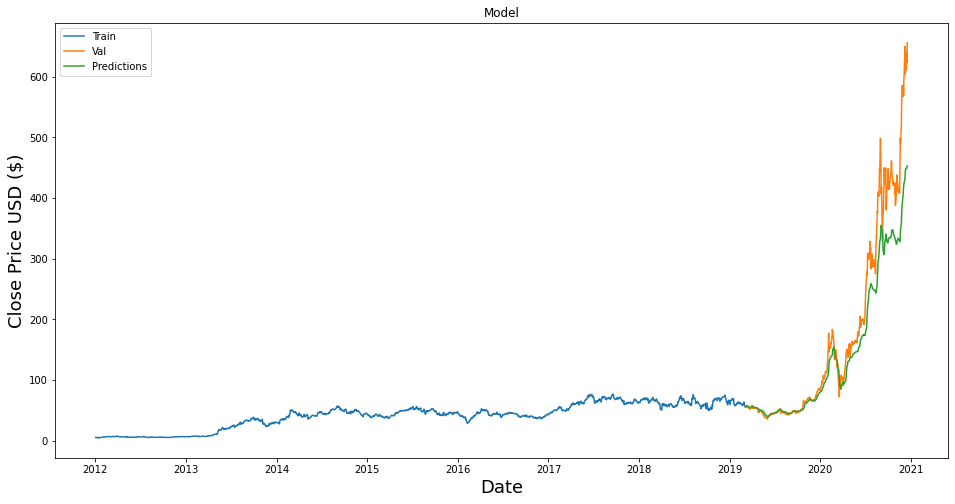

In [24]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [25]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-08,56.827999,57.418037
2019-03-11,58.183998,56.961155
2019-03-12,56.672001,56.885040
2019-03-13,57.792000,56.814617
2019-03-14,57.992001,56.893845
...,...,...
2020-12-11,609.989990,448.765320
2020-12-14,639.830017,448.807068
2020-12-15,633.250000,450.822968


In [35]:
#Get the quote 
apple_quote = web.DataReader('TSLA', data_source='yahoo',start='2018-01-03',end='2019-1-13')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X-test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[65.715256]]


In [36]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-1-14', end='2019-1-14')
print(apple_quote2['Close'])

Date
2019-01-14    37.5
Name: Close, dtype: float64
